## Tests for *intertrain* module

> Fast multidimensional function interpolation by Chebyshev polynomials in the dense (numpy) or sparse (tensor train (TT) with cross approximation) format using Fast Fourier Transform (FFT).

In [1]:
import sys
import time

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tt

sys.path.append('./../lib')
from intertrain import Intertrain, interpolate, polynomials, cross

---

### TMP

---

### Construction of Chebyshev grid

#### Full Chebyshev grid

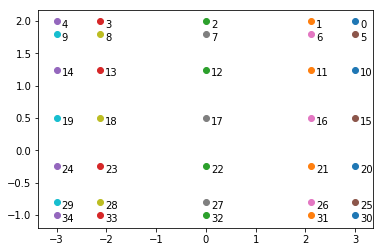

In [2]:
IT = Intertrain(n=[5, 7], l=[[-3., 3.], [-1., 2.]])

X = IT.grid()

for k in range(X.shape[1]):
    x = X[:, k]
    plt.scatter(x[0], x[1])
    plt.text(x[0]+0.1, x[1]-0.1, '%d'%k)
plt.show()

#### List of Chebyshev grid points

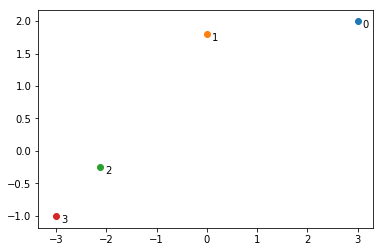

In [3]:
IT = Intertrain(n=[5, 7], l=[[-3., 3.], [-1., 2.]])

X = IT.pois([
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

for k in range(X.shape[1]):
    x = X[:, k]
    plt.scatter(x[0], x[1])
    plt.text(x[0]+0.1, x[1]-0.1, '%d'%k)
plt.show()

---

### Construction of Chebyshev polynomials

#### Chebyshev polynomials on the single point

In [4]:
T = polynomials(X=0.5, m=4)
print(T.shape, T)

(5,) [ 1.   0.5 -0.5 -1.  -0.5]


#### Chebyshev polynomials on the single point with custom limits

In [5]:
T = polynomials(X=-3., m=4, l=[[-3., 3.]])
print(T)

[ 1. -1.  1. -1.  1.]


#### Chebyshev polynomials on the simple mesh

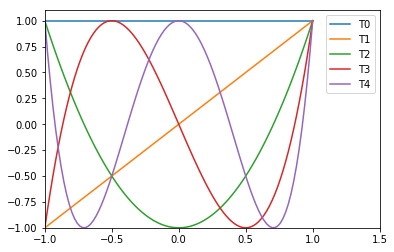

In [6]:
m = 5
X = np.linspace(-1., 1., 100)
T = polynomials(X, m)

for i in range(m):
    plt.plot(X, T[i, :], label='T%d'%i)
    
plt.xlim(-1., 1.5)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

#### Chebyshev polynomials on the simple mesh with custom limits

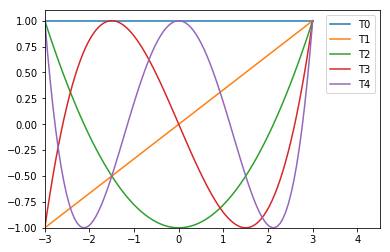

In [8]:
m = 5
X = np.linspace(-3., 3., 100)
T = polynomials(X, m, [[-3., 3.]])

for i in range(m):
    plt.plot(X, T[i, :], label='T%d'%i)
    
plt.xlim(-3., 4.5)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

#### Chebyshev polynomials on the multidimensional mesh

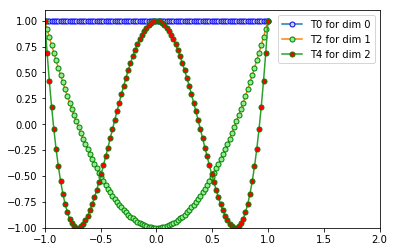

In [9]:
m = 5
X = np.linspace(-1., 1., 100)
X = np.vstack([X, X, X])
T = polynomials(X, m)

plt.plot(
    X[0, :], T[0, 0, :], label='T0 for dim 0',
    marker='o', markersize=5, markerfacecolor='lightgrey', markeredgecolor='b'
)
plt.plot(
    X[1, :], T[2, 1, :], label='T2 for dim 1',
    marker='o', markersize=5, markerfacecolor='lightgreen', markeredgecolor='g'
)
plt.plot(
    X[2, :], T[4, 2, :], label='T4 for dim 2',
    marker='o', markersize=5, markerfacecolor='red', markeredgecolor='g'
)
    
plt.xlim(-1., 2.0)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

#### Chebyshev polynomials on the multidimensional mesh with custom limits

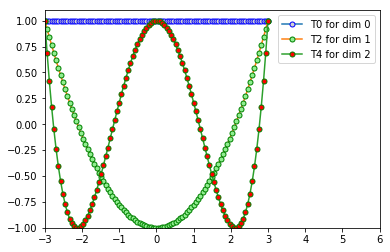

In [10]:
m = 5
X = np.linspace(-3., 3., 100)
X = np.vstack([X, X, X])
T = polynomials(X, m, [[-3., 3.]])

plt.plot(
    X[0, :], T[0, 0, :], label='T0 for dim 0',
    marker='o', markersize=5, markerfacecolor='lightgrey', markeredgecolor='b'
)
plt.plot(
    X[1, :], T[2, 1, :], label='T2 for dim 1',
    marker='o', markersize=5, markerfacecolor='lightgreen', markeredgecolor='g'
)
plt.plot(
    X[2, :], T[4, 2, :], label='T4 for dim 2',
    marker='o', markersize=5, markerfacecolor='red', markeredgecolor='g'
)
    
plt.xlim(-3., 6.0)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

---

### Direct construction of 1D Chebyshev interpolation

#### Direct construction of 1D Chebyshev interpolation for one function

Max relative error for interpolation nodes 1.33e-15


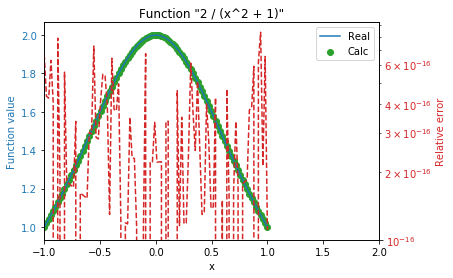

In [2]:
def f(x):
    return 2. / (x**2 + 1)

n = 200
N = n - 1
j = np.arange(n)
x = np.cos(np.pi * j / N)
u = f(x)
a = interpolate(u)

u = u.reshape(-1, 1)
v = polynomials(x, N).T@a
e = np.abs((v - u)/u)
e = np.max(np.abs(e))
print('Max relative error for interpolation nodes %-8.2e'%e)

x = np.linspace(-1., 1., 100)
u = f(x).reshape(-1, 1)
v = polynomials(x, N).T@a
e = np.abs((v - u)/u)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Function "2 / (x^2 + 1)"')
ax1.set_xlabel('x')
ax1.set_xlim(-1, 2)

color = 'tab:blue'
ax1.set_ylabel('Function value', color=color)
ax1.plot(x, u, color=color, label='Real')
ax1.scatter(x, v, color='tab:green', label='Calc')
ax1.tick_params(axis='y', which='both', labelcolor=color)
ax1.legend(loc='best')

color = 'tab:red'
ax2.set_ylabel('Relative error', color=color)
ax2.plot(x, e, '--', color=color)
ax2.tick_params(axis='y', which='both', labelcolor=color)
ax2.semilogy()

plt.show()

#### Direct construction of 1D Chebyshev interpolation for several functions

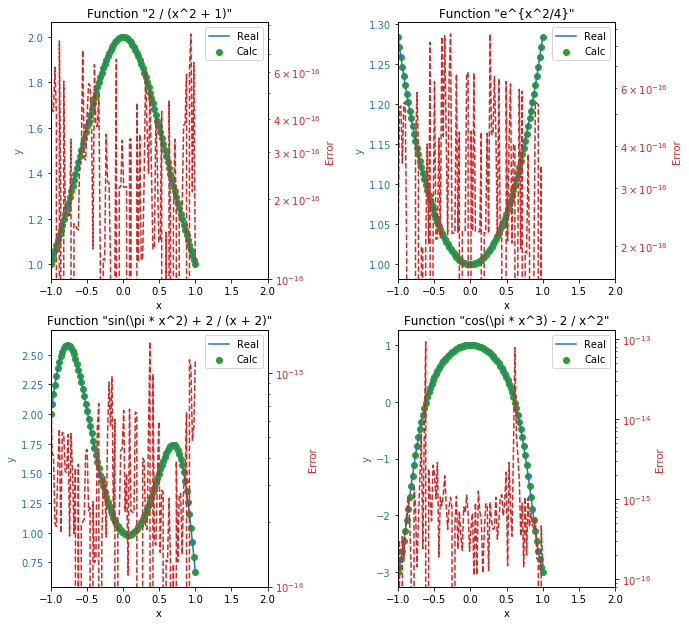

In [3]:
def f1(x): return 2. / (x**2 + 1)
def f2(x): return np.exp(x**2 / 4.)
def f3(x): return np.sin(np.pi * x**2) + 2. / (x + 2.)
def f4(x): return np.cos(np.pi * x**3) - 2. * x**2

funcs = [
    '2 / (x^2 + 1)',
    'e^{x^2/4}',
    'sin(\pi * x^2) + 2 / (x + 2)',
    'cos(\pi * x^3) - 2 / x^2',
]

n = 200
N = n - 1
j = np.arange(n)
x = np.cos(np.pi * j / N)
u1 = f1(x).reshape(-1, 1)
u2 = f2(x).reshape(-1, 1)
u3 = f3(x).reshape(-1, 1)
u4 = f4(x).reshape(-1, 1)
a = interpolate(np.hstack([u1, u2, u3, u4]))

fig = plt.figure(figsize=(8, 8))
gs = mpl.gridspec.GridSpec(
    ncols=2, nrows=2, left=0.01, right=0.99, top=0.99, bottom=0.01,
    wspace=0.6, hspace=0.2, width_ratios=[1, 1], height_ratios=[1, 1]
)

x = np.linspace(-1., 1., 100)

for k in range(len(funcs)):
    i = int(k / 2)
    j = k - 2*i
    
    u = eval('f%d'%(k+1))(x)
    v = polynomials(x, N).T@a[:, k]
    e = np.abs((v - u)/u)

    ax1 = fig.add_subplot(gs[i, j])
    ax2 = ax1.twinx()
    
    ax1.set_title('Function "%s"'%funcs[k])
    ax1.set_xlabel('x')
    ax1.set_xlim(-1, 2)

    color = 'tab:blue'
    ax1.set_ylabel('y', color=color)
    ax1.plot(x, u, color=color, label='Real')
    ax1.scatter(x, v, color='tab:green', label='Calc')
    ax1.tick_params(axis='y', which='both', labelcolor=color)
    ax1.legend(loc='best')

    color = 'tab:red'
    ax2.set_ylabel('Error', color=color)
    ax2.plot(x, e, '--', color=color)
    ax2.tick_params(axis='y', which='both', labelcolor=color)
    ax2.semilogy()

plt.show()

#### Complexity estimation of 1D Chebyshev interpolation for several functions

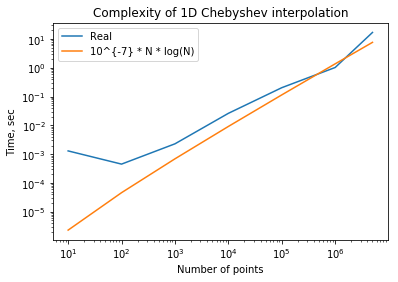

In [9]:
def f(x):
    return np.exp(x**2 / 4.)

k = 10
N = np.array([1E1, 1E2, 1E3, 1E4, 1E5, 1E6, 5E6])
T = np.array([])

for n in N:
    j = np.arange(n)
    x = np.cos(np.pi * j / (n-1))
    u = f(x).reshape(-1, 1)
    t = time.time()
    a = interpolate(np.repeat(u, k, axis=1))
    T = np.append(T, [time.time()-t])

C = N * np.log(N)/1.0E7

plt.plot(N, T, label='Real')
plt.plot(N, C, label='10^{-7} * N * log(N)')
plt.title('Complexity of 1D Chebyshev interpolation')
plt.xlabel('Number of points')
plt.ylabel('Time, sec')
plt.semilogx()
plt.semilogy()
plt.legend(loc='best')
plt.show()

---

### Test for cross approximation in the TT-format util

In [4]:
def f(x):
    return 1. + x[0, ] ** 1 + x[1, ] ** 2 + x[2, ] ** 3

def f_pois(i):
    return i

n = [5, 6, 7]
eps = 1.E-6
opts = {
    'nswp': 2,
}

Y, crs_res = cross(f, f_pois, n, eps, opts)
Y = Y.full()

I = np.array([
    [1, 2, 3, 4],
    [2, 1, 0, 3],
    [3, 2, 1, 0]
])
y_real = f(f_pois(I))
y_calc = np.array([Y[tuple(I[:, k])] for k in range(I.shape[1])])
err = np.abs((y_real - y_calc) / y_real)

print('Result: ', crs_res)
print('Errors: ', ', '.join(['%8.2e'%e for e in err]))

Result:  {'evals': 384, 't_func': 8.835146824518839e-07, 'iters': 2, 'err_rel': 2.3e-15, 'err_abs': 3.6e-12, 'erank': 5.0}
Errors:  0.00e+00, 2.96e-16, 0.00e+00, 2.54e-16


---

### Tests for interpolation by Chebyshev polynomials in the TT-format with cross approximation

Let consider 4D function of the form

$$
f(x) = 7 + x_1^2 + e^{-x_2} + \sin{x_3} + x_4^3
$$

In [6]:
def func(x):
    return 7. + x[0, ]**2 + np.exp(-x[1, ]) + np.sin(x[2, ]) + x[3, ]**3

n = [4, 5, 6, 7]
l = [[-3., 3.], [-2., 2.], [-4., 4.], [-1., 1.]]

#### Interpolation in the dense (numpy) format

In [7]:
IT = Intertrain(n, l, with_tt=False)
IT.init(func)
IT.prep()
IT.info()

NotImplementedError: Is not implemented.

#### Interpolation in the sparse (tensor train) format

In [8]:
IT = Intertrain(n, l, eps=1.E-6)
IT.init(func)
IT.prep()
IT.info()

------------------ Parameters
Format           : TT
Dimensions       :        4
Accuracy         : 1.00e-06
Dim 1  | Poi 4   | Min -3.000 | Max 3.000  |
Dim 2  | Poi 5   | Min -2.000 | Max 2.000  |
Dim 3  | Poi 6   | Min -4.000 | Max 4.000  |
Dim 4  | Poi 7   | Min -1.000 | Max 1.000  |
------------------ Result (cross appr)
Func. evaluations:     1382
Cross iterations :        3
Av. tt-rank      : 6.50e+00
Cross err (rel)  : 6.70e-16
Cross err (abs)  : 3.10e-13
------------------ Test (random points)
Number of points : 10
Error (max)      : 5.76e-03 
Error (mean)     : 3.17e-03 
Error (min)      : 7.68e-04 
------------------ Time
Init             : 3.01e-02 sec. 
Prep             : 2.86e-03 sec. 
Calc (average)   : 8.49e-04 sec. 
Func (average)   : 4.97e-07 sec. 
------------------


#### Complexity

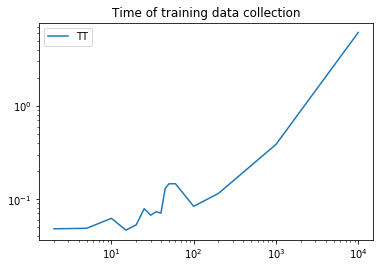

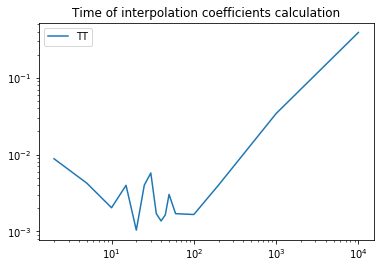

In [4]:
N = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 100, 200, 1000, 10000]
T_init = []
T_prep = []
for n in N:
    IT = Intertrain([n]*4, l, eps=1.E-6)
    IT.init(func)
    IT.prep()
    T_init.append(IT._t_init)
    T_prep.append(IT._t_prep)
    
plt.title('Time of training data collection')
plt.plot(N, T_init, label='TT')
plt.semilogx()
plt.semilogy()
plt.legend(loc='best')
plt.show()

plt.title('Time of interpolation coefficients calculation')
plt.plot(N, T_prep, label='TT')
plt.semilogx()
plt.semilogy()
plt.legend(loc='best')
plt.show() 

---